In [25]:
import sys
sys.path.append('../notebooks')
import utils
import cv2
import glob
import os
import matplotlib.cm as cm
import numpy as np
import pylab as pl
%matplotlib inline

In [60]:
#fname = '2286.png'
#fname = '2291.png'
#fname = '2319.png'
fname = '2.png'
img = cv2.imread(os.path.join(PRED_DIR, fname), cv2.IMREAD_GRAYSCALE)
img = (img != 0).astype(np.uint8) * 255

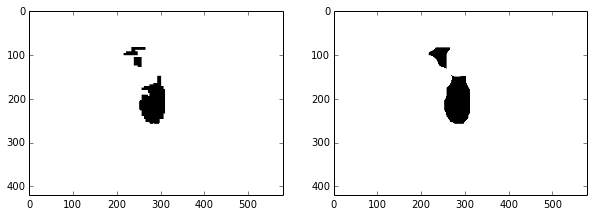

In [61]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(50,50))
img2 = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

pl.figure(figsize=(10, 10))
pl.subplot(121)
pl.imshow(img, cmap=cm.binary)
pl.subplot(122)
pl.imshow(img2, cmap=cm.binary)

In [ ]:
# TODO: Could also try fitting an ellipse and remove those which do not fit the ellipse enough

In [62]:
import sys
import shutil

PRED_DIR='../../preds'
OUT_PRED_DIR='../../preds_closed'

if os.path.exists(OUT_PRED_DIR):
    shutil.rmtree(OUT_PRED_DIR)
utils.mkdir_p(OUT_PRED_DIR)

test_fnames = ['%d.png' % i for i in range(1,5509)]

for i, fname in enumerate(test_fnames):
    img = cv2.imread(os.path.join(PRED_DIR, fname), cv2.IMREAD_GRAYSCALE)
    img = (img != 0).astype(np.uint8) * 255
    img2 = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
    cv2.imwrite(os.path.join(OUT_PRED_DIR, fname), img2)
    if i % 10 == 0:
        print '\r%d / %d' % (i, len(test_fnames)),
        sys.stdout.flush()

5500 / 5508
